In [1]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:

# Define a consistent color palette
palette = sns.color_palette("Paired")  # Replace "husl" with your chosen palette

# Set the palette for Seaborn
sns.set_palette(palette)

# Set the same palette for Matplotlib
plt.rc('axes', prop_cycle=(plt.cycler('color', palette)))

# Now, when you create plots with Matplotlib or Seaborn, they will use the colors from this palette


In [3]:
df_listing = pd.read_csv('/Users/saphir/Desktop/UChi/DE/Final Project/Airbnb/Data/all_listings.csv')
df_listing.head()

id                                            name  host_id host_name  \
0    2384                    Hyde Park - Walk to UChicago     2613   Rebecca   
1   94450             Comfy Garden Suite in Andersonville   504470      Mark   
2  145659     Trendy Roscoe Village 3BR/2BR walk to shops   683529       Joe   
3    7126             Tiny Studio Apartment 94 Walk Score    17928     Sarah   
4  189821  Best in Chicago, private, amazing garden space   899757   Meighan   

  neighbourhood  latitude  longitude        room_type  price  minimum_nights  \
0     Hyde Park  41.78790  -87.58780     Private room     90               3   
1     Edgewater  41.97960  -87.66512  Entire home/apt     65               7   
2  North Center  41.94342  -87.68121  Entire home/apt    198               2   
3     West Town  41.90166  -87.68021  Entire home/apt     85               2   
4  Logan Square  41.92918  -87.70219  Entire home/apt    202               3   

   number_of_reviews last_review  reviews_per_month  \
0                212  04/03/2023               2.13   
1                  7  01/12/2022               0.88   
2                 59  31/12/2022               0.65   
3                483  26/02/2023               2.89   
4                598  25/02/2023               4.27   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               1               347                     20   
1                               1               178                      7   
2                              22               330                     15   
3                               1               279                     48   
4                               1               207                     24   

        license quarter  
0  R17000015609      Q1  
1  R22000082956      Q1  
2       2209272      Q1  
3  R21000075737      Q1  
4  R21000062936      Q1

In [4]:
df_listing.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'license', 'quarter'],
      dtype='object')

In [5]:
df_listing.shape

(31924, 18)

In [6]:
# Drop the features irrelevant to pricing
df = df_listing.copy()
df = df.drop(['id', 'host_id', 'name','host_name'],axis = 1)

In [7]:
df.head(10)

neighbourhood  latitude  longitude        room_type  price  minimum_nights  \
0     Hyde Park  41.78790  -87.58780     Private room     90               3   
1     Edgewater  41.97960  -87.66512  Entire home/apt     65               7   
2  North Center  41.94342  -87.68121  Entire home/apt    198               2   
3     West Town  41.90166  -87.68021  Entire home/apt     85               2   
4  Logan Square  41.92918  -87.70219  Entire home/apt    202               3   
5       Pullman  41.68843  -87.60712  Entire home/apt    100               2   
6       Pullman  41.68954  -87.60786  Entire home/apt     50              32   
7     Lake View  41.94842  -87.65307  Entire home/apt    379               1   
8  Lincoln Park  41.91196  -87.63981  Entire home/apt    171               4   
9     Lake View  41.94774  -87.65421  Entire home/apt    479               1   

   number_of_reviews last_review  reviews_per_month  \
0                212  04/03/2023               2.13   
1                  7  01/12/2022               0.88   
2                 59  31/12/2022               0.65   
3                483  26/02/2023               2.89   
4                598  25/02/2023               4.27   
5                299  12/02/2023               2.13   
6                 45  20/12/2022               0.32   
7                 13  21/08/2022               0.11   
8                 60  02/01/2023               0.55   
9                 26  12/03/2023               1.11   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               1               347                     20   
1                               1               178                      7   
2                              22               330                     15   
3                               1               279                     48   
4                               1               207                     24   
5                               3               361                     20   
6                               3                87                      1   
7                               6               206                      3   
8                              10                99                     19   
9                               6               215                     10   

        license quarter  
0  R17000015609      Q1  
1  R22000082956      Q1  
2       2209272      Q1  
3  R21000075737      Q1  
4  R21000062936      Q1  
5  R21000073121      Q1  
6  R21000073121      Q1  
7       2446868      Q1  
8       2209984      Q1  
9       2446868      Q1

In [8]:
# Check the missing values
df.isnull().sum()

neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       6205
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           6228
quarter                              0
dtype: int64

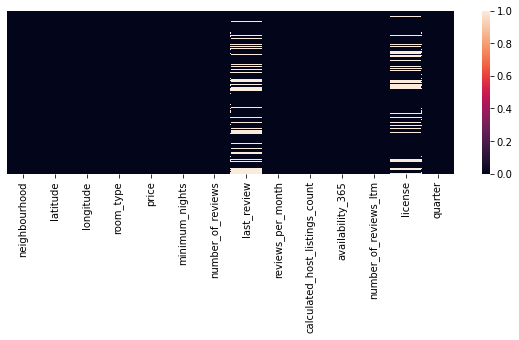

In [9]:
plt.figure(figsize=(10,3))
sns.heatmap(df.isnull(),yticklabels=False)
plt.show()

Max price of the listing: $99,998
Min price of the listing: $0
Average price of the listing: $199
Median price of the listing: $130
Standard deviation of the listing price: $974


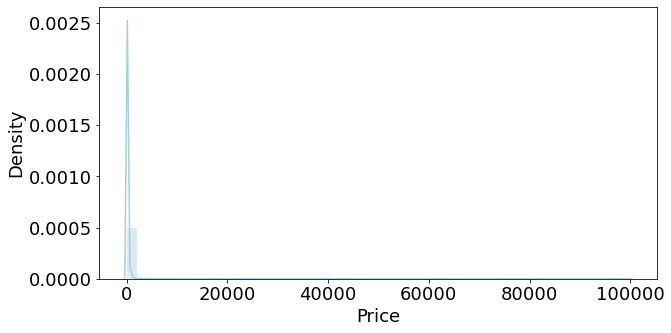

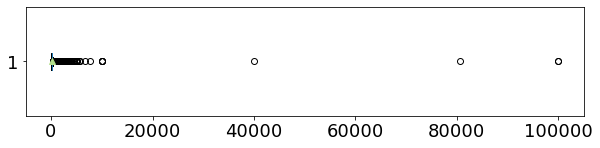

In [10]:
# Check the distribution of the target price
print('Max price of the listing: ${:,.0f}'.format(np.max(df['price'])))
print('Min price of the listing: ${:,.0f}'.format(np.min(df['price'])))
print('Average price of the listing: ${:,.0f}'.format(np.mean(df['price'])))
print('Median price of the listing: ${:,.0f}'.format(np.median(df['price'])))
print('Standard deviation of the listing price: ${:,.0f}'.format(np.std(df['price'])))
plt.figure(figsize = (10,5))
sns.distplot(df['price'])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Price',fontsize=18)
plt.ylabel('Density',fontsize=18)


plt.figure(figsize= (10,2))
plt.boxplot(df['price'], vert = False, showmeans = True)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

In [11]:
# Clean the outliers
df = df[df['price']<20000]
df = df[df['price']>0]
df.head(10)

neighbourhood  latitude  longitude        room_type  price  minimum_nights  \
0     Hyde Park  41.78790  -87.58780     Private room     90               3   
1     Edgewater  41.97960  -87.66512  Entire home/apt     65               7   
2  North Center  41.94342  -87.68121  Entire home/apt    198               2   
3     West Town  41.90166  -87.68021  Entire home/apt     85               2   
4  Logan Square  41.92918  -87.70219  Entire home/apt    202               3   
5       Pullman  41.68843  -87.60712  Entire home/apt    100               2   
6       Pullman  41.68954  -87.60786  Entire home/apt     50              32   
7     Lake View  41.94842  -87.65307  Entire home/apt    379               1   
8  Lincoln Park  41.91196  -87.63981  Entire home/apt    171               4   
9     Lake View  41.94774  -87.65421  Entire home/apt    479               1   

   number_of_reviews last_review  reviews_per_month  \
0                212  04/03/2023               2.13   
1                  7  01/12/2022               0.88   
2                 59  31/12/2022               0.65   
3                483  26/02/2023               2.89   
4                598  25/02/2023               4.27   
5                299  12/02/2023               2.13   
6                 45  20/12/2022               0.32   
7                 13  21/08/2022               0.11   
8                 60  02/01/2023               0.55   
9                 26  12/03/2023               1.11   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               1               347                     20   
1                               1               178                      7   
2                              22               330                     15   
3                               1               279                     48   
4                               1               207                     24   
5                               3               361                     20   
6                               3                87                      1   
7                               6               206                      3   
8                              10                99                     19   
9                               6               215                     10   

        license quarter  
0  R17000015609      Q1  
1  R22000082956      Q1  
2       2209272      Q1  
3  R21000075737      Q1  
4  R21000062936      Q1  
5  R21000073121      Q1  
6  R21000073121      Q1  
7       2446868      Q1  
8       2209984      Q1  
9       2446868      Q1

Max price of the listing: $10,000
Min price of the listing: $10
Average price of the listing: $189
Median price of the listing: $130
Standard deviation of the listing price: $269


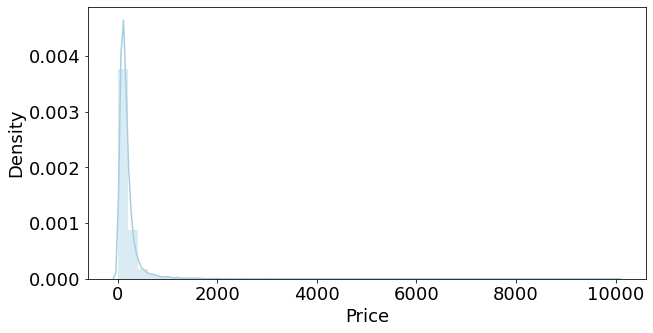

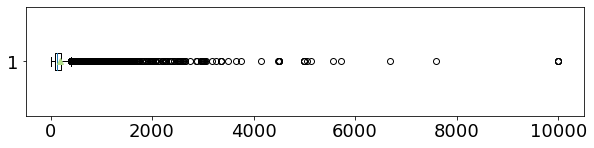

In [12]:
# Check the distribution of the target price
print('Max price of the listing: ${:,.0f}'.format(np.max(df['price'])))
print('Min price of the listing: ${:,.0f}'.format(np.min(df['price'])))
print('Average price of the listing: ${:,.0f}'.format(np.mean(df['price'])))
print('Median price of the listing: ${:,.0f}'.format(np.median(df['price'])))
print('Standard deviation of the listing price: ${:,.0f}'.format(np.std(df['price'])))
plt.figure(figsize = (10,5))
sns.distplot(df['price'])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Price',fontsize=18)
plt.ylabel('Density',fontsize=18)


plt.figure(figsize= (10,2))
plt.boxplot(df['price'], vert = False, showmeans = True)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

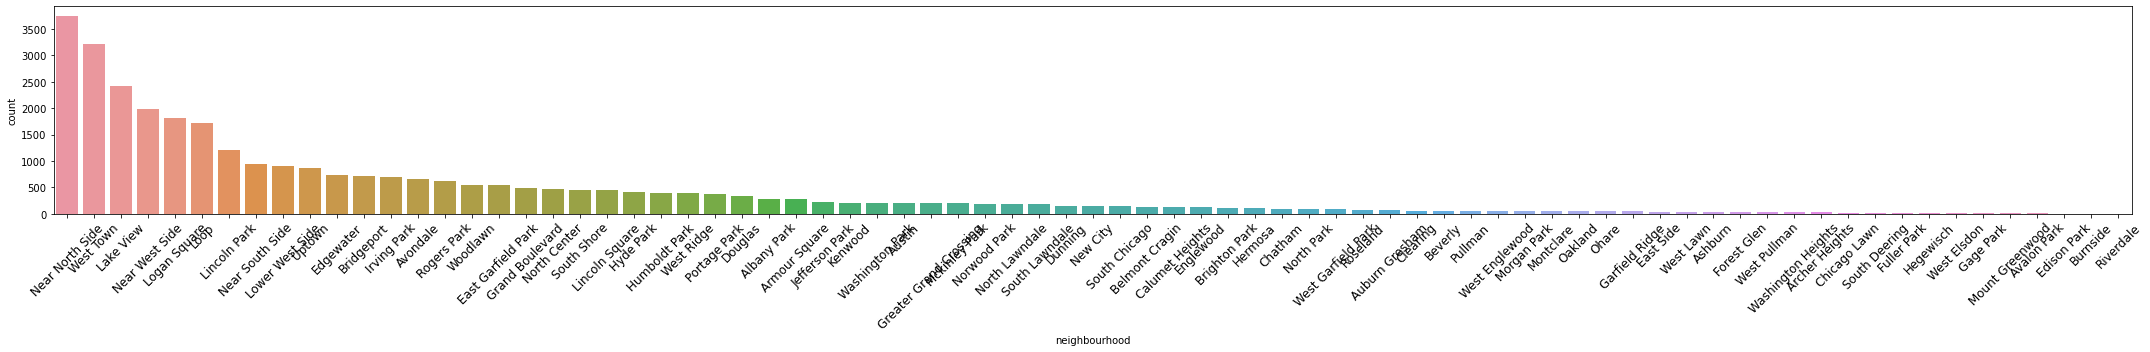

In [26]:
# ### Visualization

# ### Listing supply

plt.figure(figsize = (30,5))
sns.countplot(df['neighbourhood'],order = df['neighbourhood'].value_counts().index)
plt.xticks(rotation=45,fontsize=12)
plt.tight_layout()
plt.show()

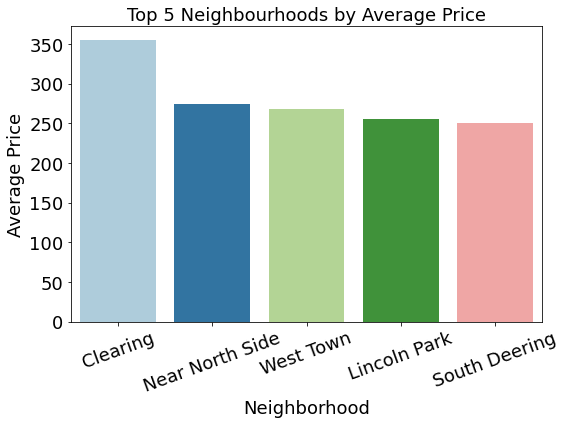

In [16]:


# Calculate the average price by neighbourhood and sort them
top_neighbourhoods = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(5)

# Create a figure with specified size
plt.figure(figsize=(8, 6))  # Adjust the size as per your requirement

# Create the bar plot with the top 5 neighbourhoods
sns.barplot(x=top_neighbourhoods.index, y=top_neighbourhoods.values)

# Set the title and labels (optional, for better readability)
plt.title('Top 5 Neighbourhoods by Average Price', fontsize = 18)

plt.xticks(fontsize=18,rotation = 20)
plt.yticks(fontsize=18)
plt.xlabel('Neighborhood',fontsize=18)
plt.ylabel('Average Price',fontsize=18)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


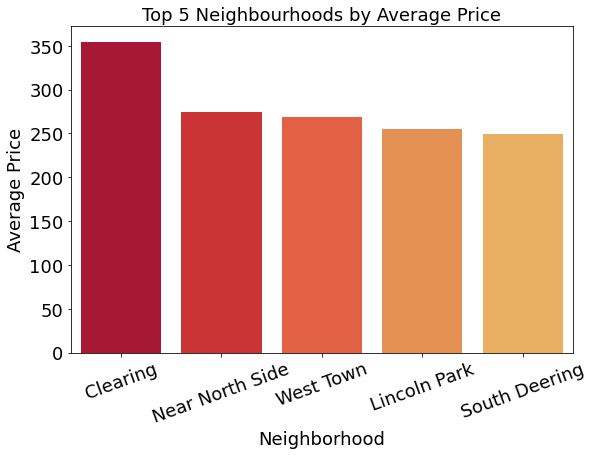

In [17]:
palette2 = sns.color_palette("YlOrRd_r", n_colors=7)
palette2 = palette2[:5]
plt.figure(figsize=(9, 6))
sns.barplot(x=top_neighbourhoods.index, y=top_neighbourhoods.values, palette = palette2)
plt.title('Top 5 Neighbourhoods by Average Price', fontsize = 18)

plt.xlabel('Average Price')
plt.ylabel('License Status')
plt.xticks(fontsize=18,rotation = 20)
plt.yticks(fontsize=18)
plt.xlabel('Neighborhood',fontsize=18)
plt.ylabel('Average Price',fontsize=18)
plt.show()

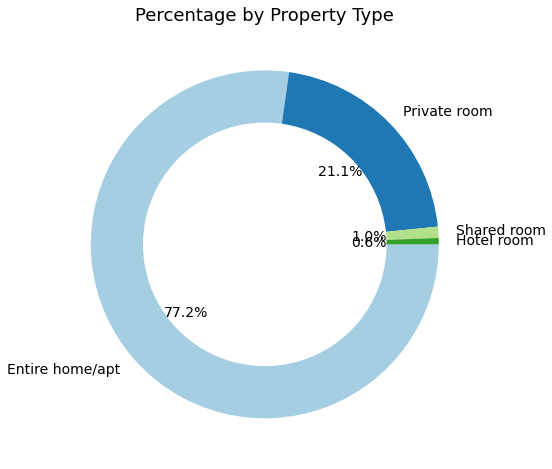

In [13]:
plt.figure(figsize = (8,8))
plt.title('Percentage by Property Type',fontsize=18)
v = dict(df['room_type'].value_counts())
#colors = ['cadetblue','darkseagreen','khaki','lightyellow']
plt.pie(list(v.values()),autopct='%.1f%%',labels=(list(v.keys())),
        counterclock = False,
        wedgeprops = {'width':0.3},textprops={'fontsize': 14})
#plt.legend() 
plt.show()

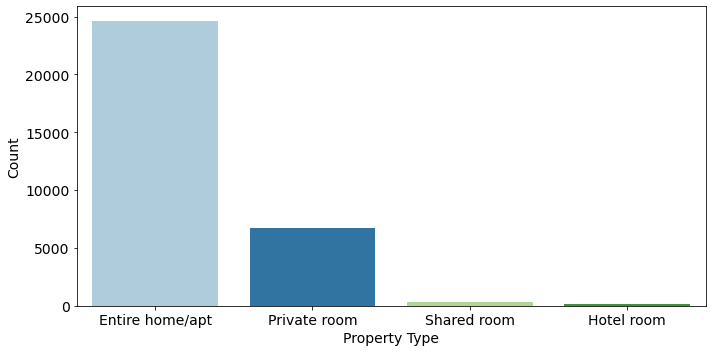

In [31]:
plt.figure(figsize = (10,5))
sns.countplot(df['room_type'],order = df['room_type'].value_counts().index)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Property Type',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.tight_layout()
plt.show()

<Figure size 720x360 with 0 Axes>

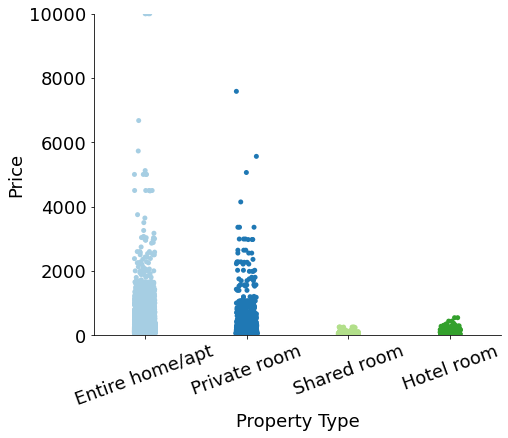

In [14]:
plt.figure(figsize = (10,5))
# Define the figure size through the height and aspect ratio
g = sns.catplot(data=df, x="room_type", y="price",
                order=df['room_type'].value_counts().index,
                height=5,  # This sets the height of the plot in inches
                aspect=1.3, ci=None)  # This sets the width as a multiple of the height

# Set the font size for the x and y ticks
g.set_xticklabels(fontsize=18, rotation=20)
g.set_yticklabels(fontsize=18)

# Set the labels with a specific font size
g.set_xlabels('Property Type', fontsize=18)
g.set_ylabels('Price', fontsize=18)


# Adjust the title size if you have a title
# g.fig.suptitle('Your Title Here', fontsize=16)
g.set(ylim=(0, df['price'].max()))

# Show the plot
plt.show()


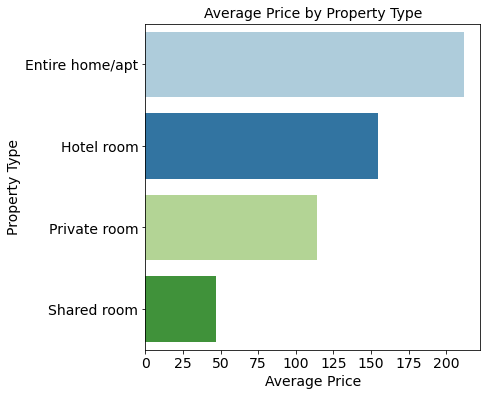

room_type       price
0  Entire home/apt  211.994726
1       Hotel room  154.437500
2     Private room  114.133432
3      Shared room   46.788060

In [34]:
# Grouping the data by room_type and calculating the average price for each
property_type_prices = df.groupby('room_type')['price'].mean().reset_index()

# Plotting the average price by property type
plt.figure(figsize=(6, 6))
sns.barplot(x='price', y='room_type', data=property_type_prices, ci=None)
plt.title('Average Price by Property Type',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Average Price',fontsize=14)
plt.ylabel('Property Type',fontsize=14)
plt.show()

property_type_prices


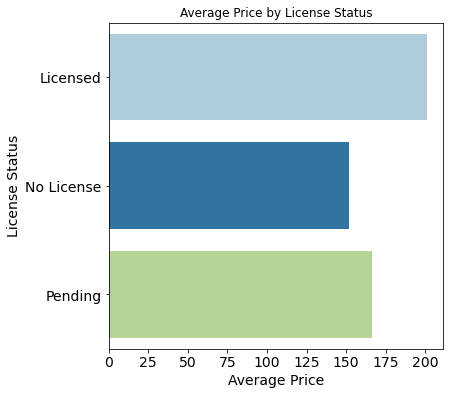

license_status       price
0       Licensed  201.319854
1     No License  151.675979
2        Pending  166.126437

In [35]:
data = df.copy()
# Categorizing the license status
data['license_status'] = data['license'].apply(lambda x: 'Licensed' if pd.notnull(x) and x != 'City registration pending'
                                               else ('Pending' if x == 'City registration pending'
                                                     else 'No License'))

# Grouping the data by license_status and calculating the average price for each
license_status_prices = data.groupby('license_status')['price'].mean().reset_index()

# Plotting the average price by license status
plt.figure(figsize=(6, 6))
sns.barplot(x='price', y='license_status', data=license_status_prices, ci=None)
plt.title('Average Price by License Status')
plt.xlabel('Average Price')
plt.ylabel('License Status')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Average Price',fontsize=14)
plt.ylabel('License Status',fontsize=14)

plt.show()

license_status_prices


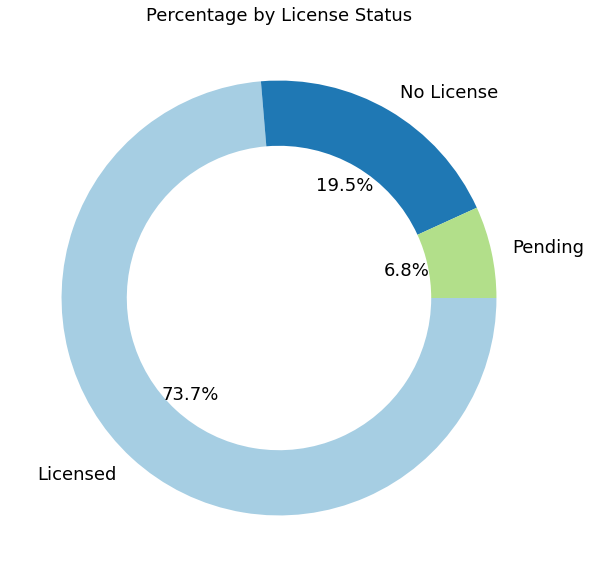

In [36]:
plt.figure(figsize = (10,10))
plt.title('Percentage by License Status',fontsize=18)
v2 = dict(data['license_status'].value_counts())
#colors = ['cadetblue','darkseagreen','khaki','lightyellow']
plt.pie(list(v2.values()),autopct='%.1f%%',labels=(list(v2.keys())),
        counterclock = False,
        wedgeprops = {'width':0.3},textprops={'fontsize': 18})
plt.show()

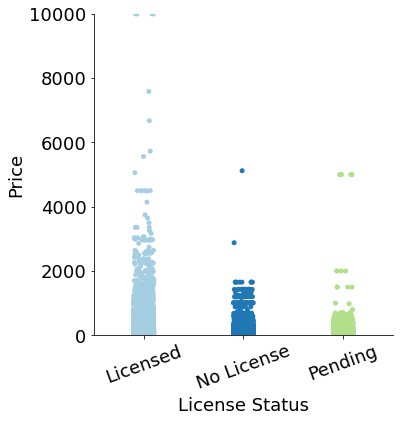

In [37]:
# Assuming 'license_status' is the column in your DataFrame with the license status information
g = sns.catplot(data=data, x="license_status", y="price",
                order=data['license_status'].value_counts().index,
                height=5, aspect=1)  # Adjust the height and aspect ratio as needed

# Customize the appearance of the plot
g.set_xticklabels(fontsize=18, rotation=20)  # Rotation for better label readability
g.set_yticklabels(fontsize=18)
g.set_xlabels('License Status', fontsize=18)
g.set_ylabels('Price', fontsize=18)

# Set the y-axis limits if necessary
g.set(ylim=(0, df['price'].max()))  # Adjust the limits as per your data range

# Show the plot
plt.show()



## Mapping

In [39]:
data = df.copy()

In [40]:
import folium
from folium import Choropleth, LayerControl

# Load the GeoJSON file
geojson_path = '/Users/saphir/Desktop/UChi/DE/Final Project/Airbnb/neighbourhoods.geojson'

# Create a base map
map_chicago = folium.Map(location=[data['latitude'].mean(), data['longitude'].mean()], zoom_start=11)

# Calculate the average price by neighbourhood
average_price_by_neighbourhood = data.groupby('neighbourhood')['price'].mean().reset_index()

# Create a choropleth map
Choropleth(
    geo_data=geojson_path,
    name='choropleth',
    data=average_price_by_neighbourhood,
    columns=['neighbourhood', 'price'],
    key_on='feature.properties.neighbourhood',  s
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Average Price'
).add_to(map_chicago)

# Add layer control to toggle on/off
LayerControl().add_to(map_chicago)

map_chicago


In [41]:
import folium
from folium.plugins import HeatMap

heat_data = [[row['latitude'], row['longitude'], row['price']] for index, row in data.iterrows()]

# Create a base map
map_chicago = folium.Map(location=[data['latitude'].mean(), data['longitude'].mean()], zoom_start=11)

# Create a HeatMap layer
HeatMap(heat_data).add_to(map_chicago)

# Display the map
map_chicago


In [42]:
import folium
from folium.plugins import HeatMap
from folium import GeoJson


# Load the GeoJSON file
geojson_path = '/Users/saphir/Desktop/UChi/DE/Final Project/Airbnb/neighbourhoods.geojson'

# Create a base map
map_chicago = folium.Map(location=[data['latitude'].mean(), data['longitude'].mean()], zoom_start=11)

# Prepare data for the HeatMap
heat_data = [[row['latitude'], row['longitude'], row['price']] for index, row in data.iterrows()]

# Create a HeatMap layer and add it to the base map
HeatMap(heat_data, radius=10, blur=15, max_zoom=1).add_to(map_chicago)

# Add the GeoJSON overlay
GeoJson(geojson_path, name='Neighborhoods').add_to(map_chicago)

# Add layer control to toggle on/off
folium.LayerControl().add_to(map_chicago)

# Display the map
map_chicago
